In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"E:\ISE 5th Sem\Lab\Part - B\10\StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,readingscore,writingscore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,NaN,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,NaN,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,NaN,standard,completed,68,78,77


In [3]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,readingscore,writingscore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,NaN,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,NaN,standard,none,76,78,75


In [4]:
df.describe()

,mathscore,readingscore,writingscore
count,1000.000000,1000.000000,1000.000000
mean,65.969000,69.169000,68.054000
std,15.310338,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,56.750000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  774 non-null    object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   mathscore                    1000 non-null   int64 
 6   readingscore                 1000 non-null   int64 
 7   writingscore                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.drop(['lunch'],axis=1,inplace=True)
df.head(5)

,gender,race/ethnicity,parental level of education,test preparation course,mathscore,readingscore,writingscore
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,NaN,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,NaN,none,76,78,75


In [7]:
df['parental level of education']=df['parental level of education'].fillna('Not applicable')
df.head(5)

,gender,race/ethnicity,parental level of education,test preparation course,mathscore,readingscore,writingscore
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,Not applicable,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,Not applicable,none,76,78,75


In [8]:
df['race/ethnicity']=df['race/ethnicity'].map({
    'group A':'Asian Students',
    'group B':'Afro Asian Students',
    'group C':'African Students',
    'group D':'American Students',
    'griup E':'European Students'
})
df.head(5)

,gender,race/ethnicity,parental level of education,test preparation course,mathscore,readingscore,writingscore
0,female,Afro Asian Students,bachelor's degree,none,72,72,74
1,female,African Students,Not applicable,completed,69,90,88
2,female,Afro Asian Students,master's degree,none,90,95,93
3,male,Asian Students,associate's degree,none,47,57,44
4,male,African Students,Not applicable,none,76,78,75


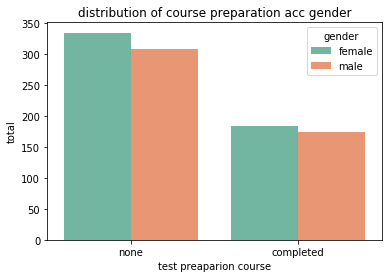

In [9]:
ax=sns.countplot(x='test preparation course',hue='gender',palette='Set2',data=df)
ax.set(title='distribution of course preparation acc gender',xlabel='test preaparion course',ylabel='total')
plt.show()

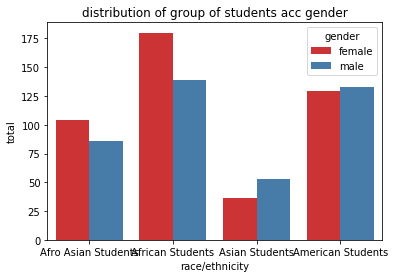

In [10]:
ax=sns.countplot(x='race/ethnicity',hue='gender',palette='Set1',data=df)
ax.set(title='distribution of group of students acc gender',xlabel='race/ethnicity',ylabel='total')
plt.show()

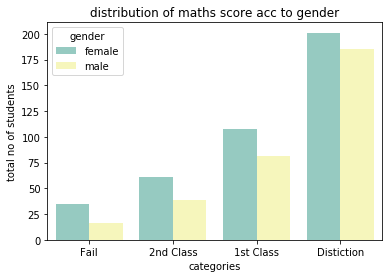

In [11]:
intervals=(0,40,50,60,75)
categories=['Fail','2nd Class','1st Class','Distiction']
df['maths_category']=pd.cut(df.mathscore,intervals,labels=categories)
ax=sns.countplot(x='maths_category',hue='gender',palette='Set3',data=df)
ax.set(title='distribution of maths score acc to gender',xlabel='categories',ylabel='total no of students')
plt.show()

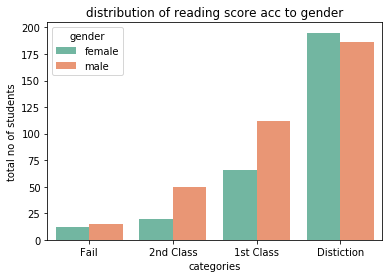

In [13]:
df['reading_category']=pd.cut(df.readingscore,intervals,labels=categories)
ax=sns.countplot(x='reading_category',hue='gender',palette='Set2',data=df)
ax.set(title='distribution of reading score acc to gender',xlabel='categories',ylabel='total no of students')
plt.show()

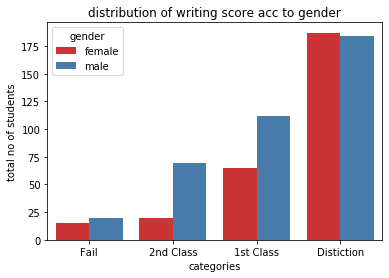

In [14]:
df['writing_category']=pd.cut(df.writingscore,intervals,labels=categories)
ax=sns.countplot(x='writing_category',hue='gender',palette='Set1',data=df)
ax.set(title='distribution of writing score acc to gender',xlabel='categories',ylabel='total no of students')
plt.show()